
Content
1. Data Cleaning
2. Exploratory Visualization 
3. Feature Engineering
4. Modeling & Evaluation
5. Ensemble Methods


In [1]:
pwd

'/home/arshleykim/Desktop/projects'

In [2]:
#loading the train and test files
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.shape

(1460, 81)

In [4]:
test_df.shape

(1459, 80)

In [6]:
idd = test_df['Id']
idd

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
        ... 
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895
1435    2896
1436    2897
1437    2898
1438    2899
1439    2900
1440    2901
1441    2902
1442    2903
1443    2904
1444    2905
1445    2906
1446    2907
1447    2908
1448    2909
1449    2910
1450    2911
1451    2912
1452    2913
1453    2914
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [7]:
##Dropping the ID colunm (not necessary for prediction)
train_df.drop("Id",axis=1,inplace=True)
test_df.drop("Id",axis=1,inplace=True)

In [8]:
print("Train data: \n")
print("colunms:"+ str (train_df.shape[1]))
print("rows:"+ str (train_df.shape[0]))

print('\nTest data:\n')
print("columns:"+ str(test_df.shape[1]))
print("rows:"+ str(test_df.shape[0]))

Train data: 

colunms:80
rows:1460

Test data:

columns:79
rows:1459


In [9]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
##descriptive statistics summary
print(train_df['SalePrice'])

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [11]:
## descriptive summary
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
##exploratory
import seaborn as sns 
from scipy import stats
from scipy.stats import skew,norm
import matplotlib.pyplot as plt
#Kernel Density plot
sns.distplot(train_df.SalePrice, fit=norm);
plt.ylabel = ('Frequency')
plt.tittle = ('SalePrice Distristribution');
##fitted parameters used
(mu,sigma) = norm.fit(train_df['SalePrice']);
##QQ plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'],plot = plt)
plt.show()

In [13]:
print("skewness:%f" % train_df['SalePrice'].skew())
print("kurtosis:%f" % train_df['SalePrice'].kurt())

skewness:1.882876
kurtosis:6.536282


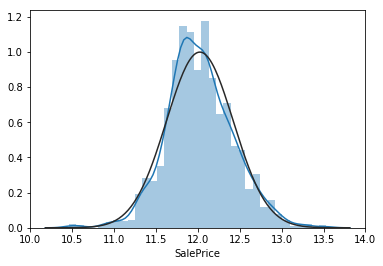

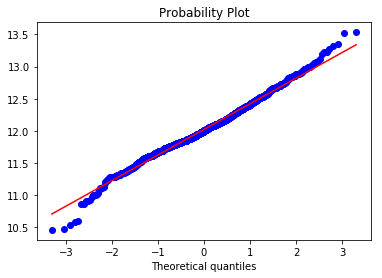

In [14]:
## log transformation the target
import numpy as np
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
## Kernel density plot
sns.distplot(train_df.SalePrice, fit=norm);
plt.ylabel = ('Frequency')
plt.tittle = ('SalePrice Distristribution');
##fitted parameters used
(mu,sigma) = norm.fit(train_df['SalePrice']);
##QQ plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'],plot = plt)
plt.show()


In [15]:
print("skewness:%f" % train_df['SalePrice'].skew())
print("kurtosis:%f" % train_df['SalePrice'].kurt())

skewness:0.121347
kurtosis:0.809519


### Dealing with missing values

In [16]:
missing = train_df.isnull().sum()
percent = missing / train_df.isnull().count()

df_missing = pd.concat([missing, percent], axis=1, keys=['Missing Values', 'missing ratio'])
df_missing = df_missing.sort_values('missing ratio', ascending=False)
df_missing[df_missing['Missing Values'] > 0]

,Missing Values,missing ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [17]:
used_values = df_missing[df_missing['Missing Values'] <= 38].index
train_df = train_df[used_values]

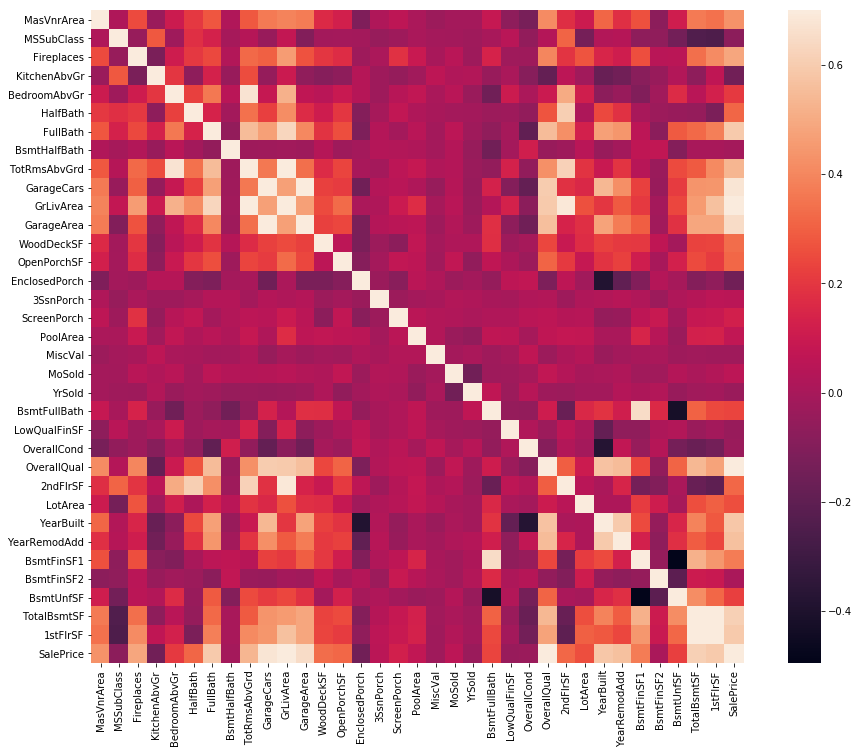

In [18]:
corr = train_df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, vmax=0.7, square=True)

In [19]:
intre_var = corr['SalePrice'].sort_values(ascending=False)
intre_var = intre_var[abs(intre_var) >= 0.5]
intre_var = intre_var[intre_var.index != 'SalePrice']

In [20]:
intre_var

OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64

In [21]:
val = np.sort(train_df['OverallQual'].unique())
print('Unique values of "OverallQual":', val)

Unique values of "OverallQual": [ 1  2  3  4  5  6  7  8  9 10]


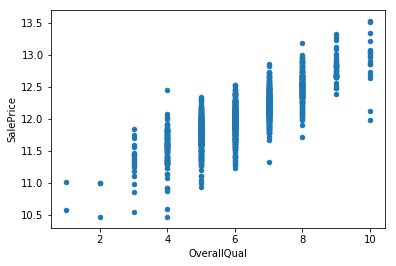

In [22]:
#plotting a relationship between the OveralQual and Saleprice
data = pd.concat([train_df['SalePrice'], train_df['OverallQual']], axis=1)
data.plot.scatter(x='OverallQual', y='SalePrice')

/home/arshleykim/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


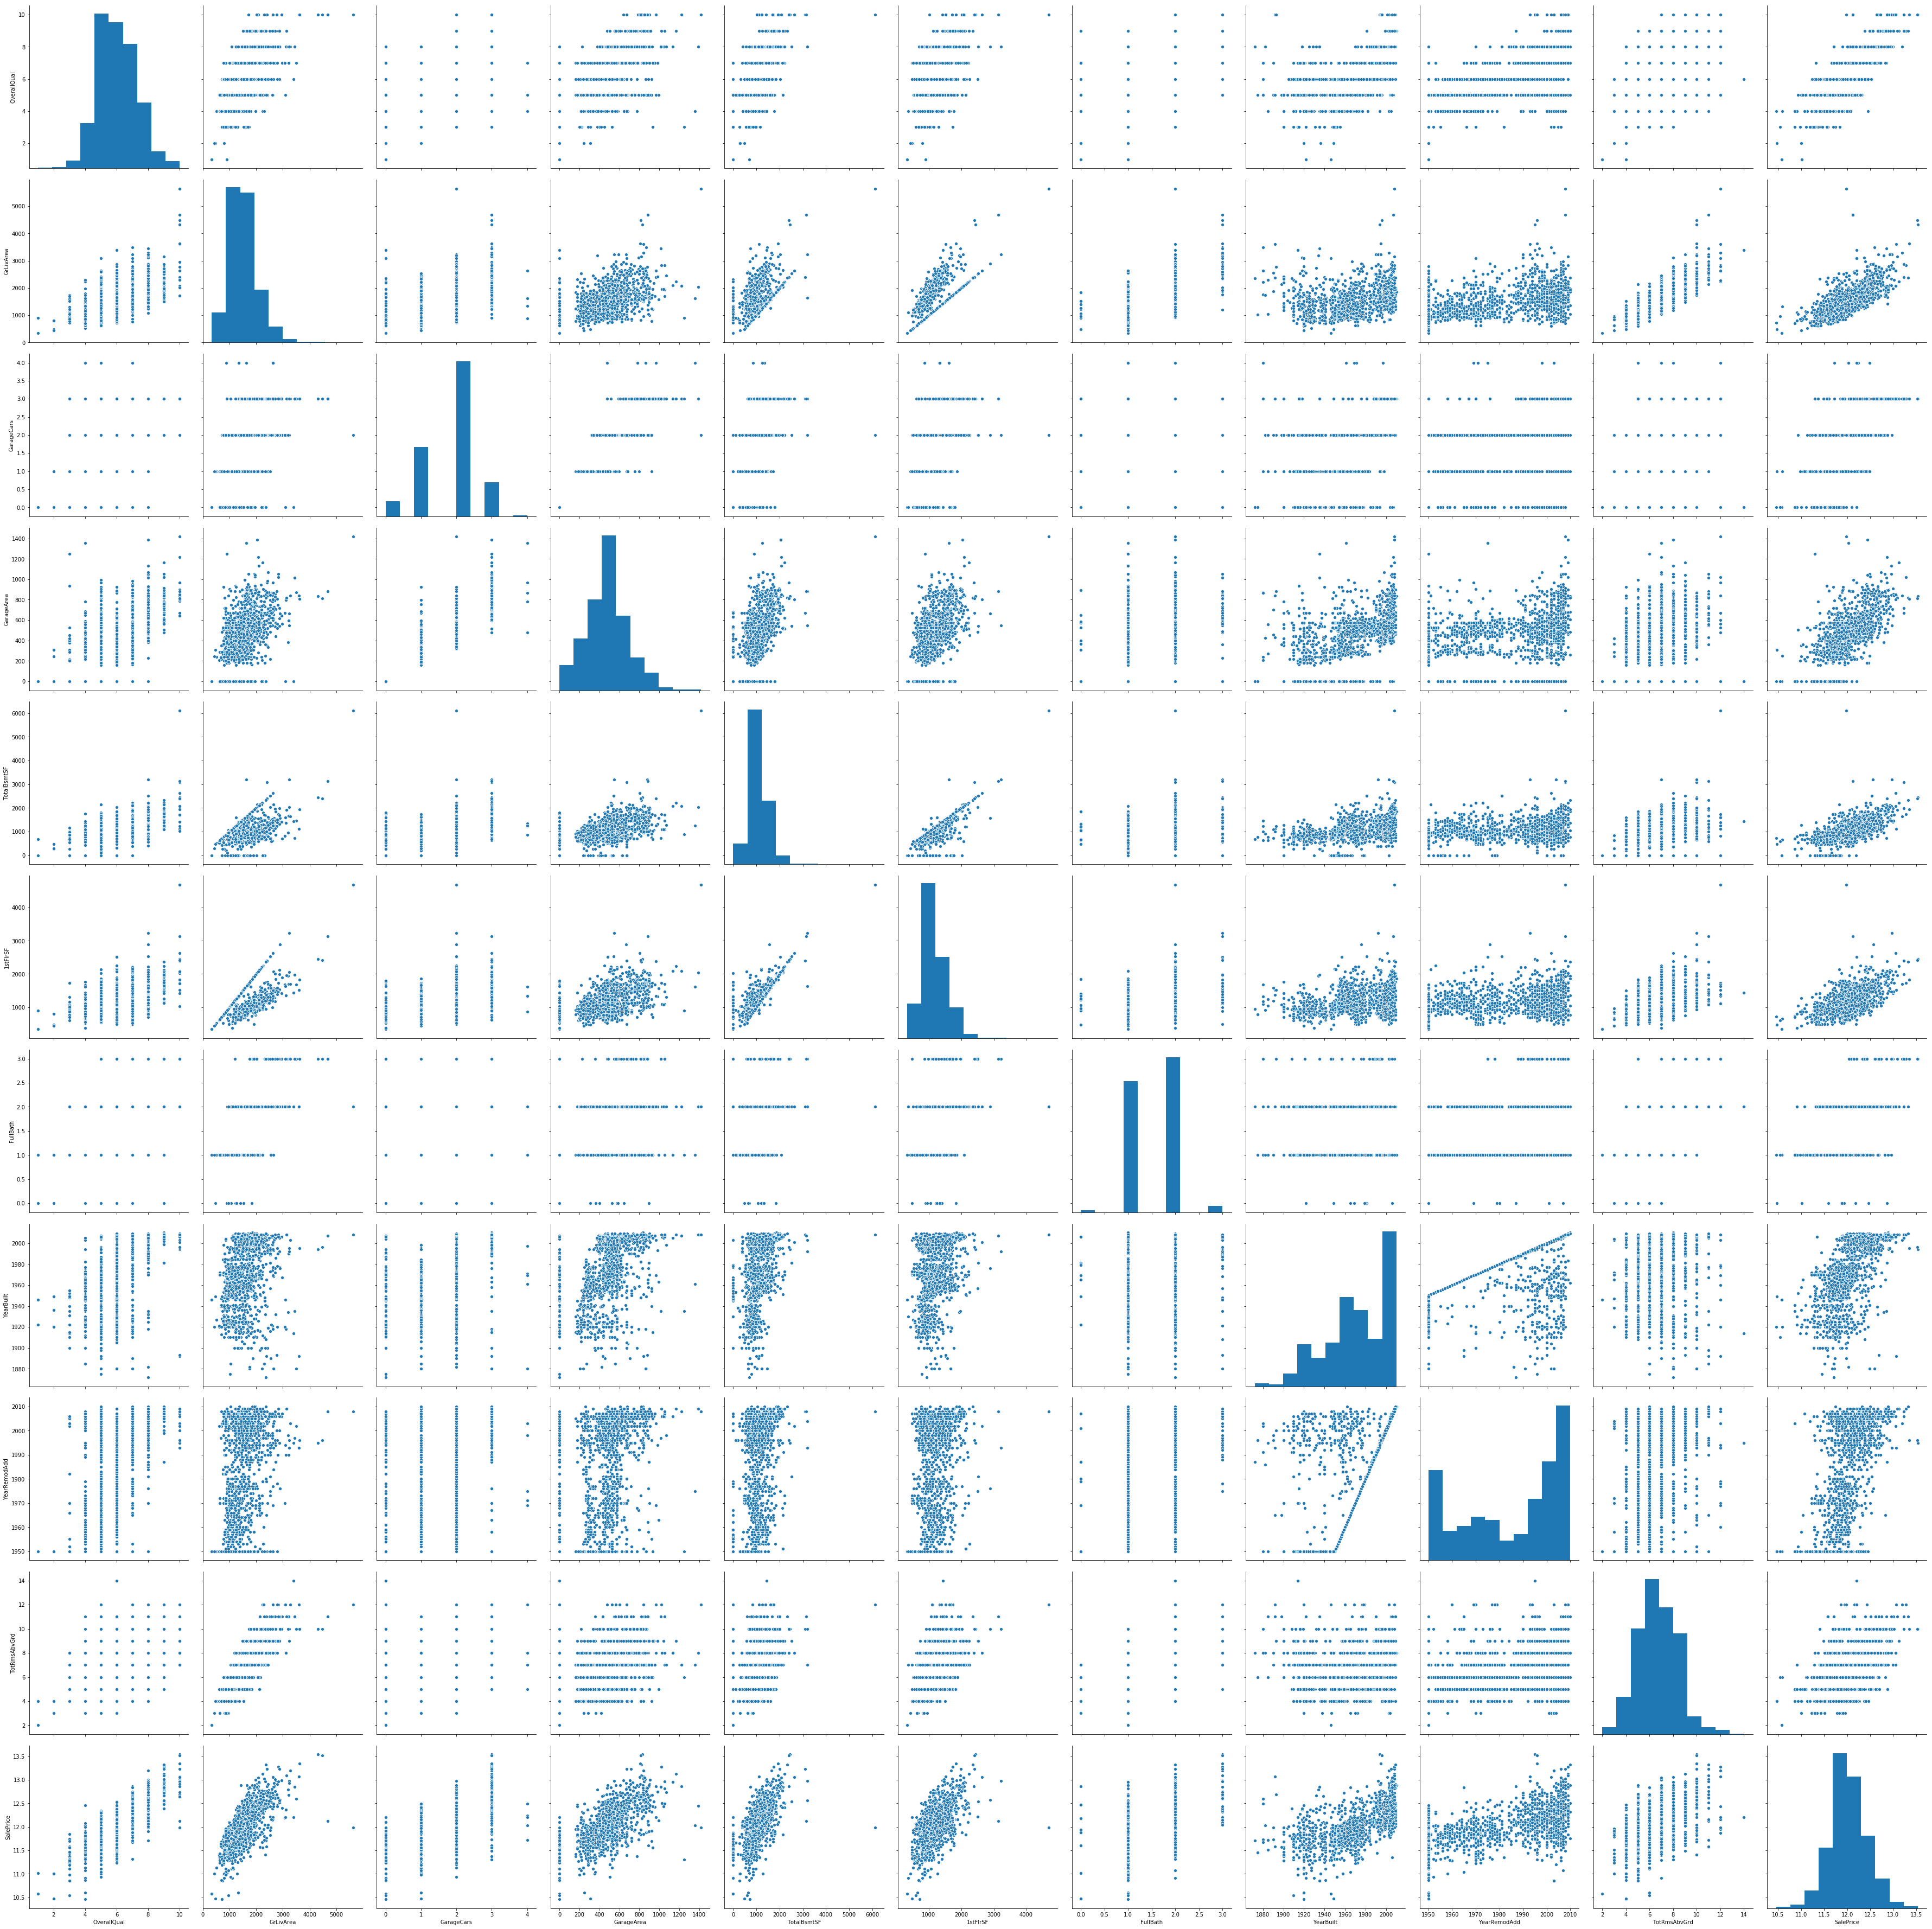

In [23]:
##Analysis of all variables of interest
cols = intre_var.index.values.tolist() + ['SalePrice']
sns.pairplot(train_df[cols], size=4.5)
plt.show()

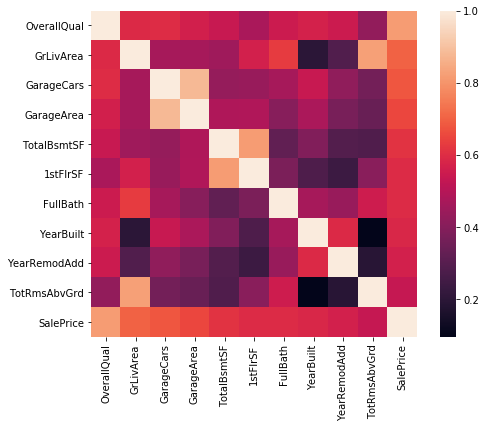

In [24]:
# Build the correlation matrix
matrix = train_df[cols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, vmax=1.0, square=True)

In [25]:
train_df.shape

(1460, 69)

In [26]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageArea', 'GarageCars'):
    train_df[col] =train_df[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    train_df[col] = train_df[col].fillna(0)

#
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(0)
#
train_df["MasVnrType"] = train_df["MasVnrType"].fillna(0)

#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    train_df[col] = train_df[col].fillna('None')
    

In [27]:
#msZoning classification: 'RL' is common
train_df['MSZoning'] = train_df['MSZoning'].fillna(train_df['MSZoning'].mode()[0])

#functional: NA is typical
train_df["Functional"] = train_df["Functional"].fillna('Typ')

#Electrical
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

#KitchenQual
train_df['KitchenQual'] = train_df['KitchenQual'].fillna(train_df['KitchenQual'].mode()[0])

#Extrerior !st and Exterior 2nd
train_df ['Exterior1st']= train_df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0])
train_df['Exterior2nd']= train_df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0])

#sale type
train_df['SaleType'] = train_df['SaleType'].fillna(train_df['SaleType'].mode()[0])

#dropping as same value 'AllPub' for all records except 2NA and 1 'NoSeWa'
train_df = train_df.drop(['Utilities'], axis=1)



In [28]:
#Transforming required numerical features to categorical 
train_df['MSSubClass']= train_df['MSSubClass'].apply(str)
train_df['OverallCond'] =train_df['OverallCond'].astype(str)
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

In [29]:
#Label Encoding some categorical variables
#for information in their ordering set

from sklearn.preprocessing import LabelEncoder
colu = ( 'BsmtQual', 'BsmtCond',  'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure',  'LandSlope',
        'LotShape', 'PavedDrive', 'Street',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in colu:
    lbl = LabelEncoder()
    lbl.fit(list(train_df[c].values))
    train_df[c] = lbl.transform(list(train_df[c].values))
#shape
print('Shape of train_df: {}'.format(train_df.shape))

Shape of train_df: (1460, 68)


In [30]:
#add total surface area as TotalSf = basement + firstflr + secondflr
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

In [31]:
#log transform skewed numeric features 
numeric_features = train_df.dtypes[train_df.dtypes != "object"].index

skewed_features = train_df[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(10)


\skew in numerical features: 



,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
LandSlope,4.808735
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186


In [32]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_df[feat] = boxcox1p(train_df[feat], lam)

There are 51 skewed numerical features to box cox transform


In [33]:
train_df = pd.get_dummies(train_df)
print(train_df.shape)


(1460, 202)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

pred_var = [v for v in intre_var.index.values if v != 'SalePrice']
target_var = 'SalePrice'

In [35]:
X = train_df[pred_var]
y = train_df[target_var]

In [36]:
#model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [46]:
y_pred = regressor.predict(X_test)
y_pred

array([3.16632198, 3.14642649, 3.1338763 , 3.08041991, 3.10171552,
       3.14980582, 3.13639554, 3.0970941 , 3.18447328, 3.1475674 ,
       3.10187016, 3.12072715, 3.16571299, 3.07511469, 3.12610297,
       3.17574449, 3.10851178, 3.13073129, 3.1464403 , 3.15954261,
       3.15754622, 3.16590867, 3.11599004, 3.15656467, 3.16898932,
       3.09064827, 3.21017598, 3.20012996, 3.18153214, 3.14811262,
       3.18129805, 3.14684291, 3.09603855, 3.09440911, 3.08394785,
       3.18829853, 3.12875771, 3.16617007, 3.08832917, 3.05372013,
       3.16424505, 3.12785865, 3.10264701, 3.1619253 , 3.11739631,
       3.17517979, 3.15761576, 3.09019986, 3.11845602, 3.10317226,
       3.24706543, 3.14289129, 3.1323468 , 3.06082736, 3.16511716,
       3.10103202, 3.12698031, 3.18506227, 3.19047176, 3.11395398,
       3.09350562, 3.17940759, 3.16441636, 3.18703395, 3.11141953,
       3.12495078, 3.16738945, 3.09957576, 3.14582107, 3.13001043,
       3.16933392, 3.12209169, 3.0790829 , 3.10692752, 3.12737

In [38]:
# accuracy calculation
score_value = regressor.score(X_train, y_train)
score_value
print("Test set accuracy: {}".format(score_value))


Test set accuracy: 0.9757461820966639


In [39]:
from sklearn.metrics import mean_squared_error as MSE

In [40]:
#compute mse_dt
mse_dt = MSE(y_test,y_pred)

#compute rmse_dt
rmse_dt = mse_dt**(0.5)

print('Test set RMSE:{}'.format(rmse_dt))



Test set RMSE:0.01859067843982467


In [43]:
idd = idd.head(438)
idd

0      1461
1      1462
2      1463
3      1464
4      1465
5      1466
6      1467
7      1468
8      1469
9      1470
10     1471
11     1472
12     1473
13     1474
14     1475
15     1476
16     1477
17     1478
18     1479
19     1480
20     1481
21     1482
22     1483
23     1484
24     1485
25     1486
26     1487
27     1488
28     1489
29     1490
       ... 
408    1869
409    1870
410    1871
411    1872
412    1873
413    1874
414    1875
415    1876
416    1877
417    1878
418    1879
419    1880
420    1881
421    1882
422    1883
423    1884
424    1885
425    1886
426    1887
427    1888
428    1889
429    1890
430    1891
431    1892
432    1893
433    1894
434    1895
435    1896
436    1897
437    1898
Name: Id, Length: 438, dtype: int64

In [44]:
submission = pd.DataFrame({'Id':idd,'SalePrice':y_pred})


In [45]:
submission.head(4)

,Id,SalePrice
0,1461,3.166322
1,1462,3.146426
2,1463,3.133876
3,1464,3.080420


In [47]:
submission.to_csv('submission.csv',index = False)